**USER BEHAVIOUR ANALYSIS**

**1.Handling missing values and user segmentation based on patterns**

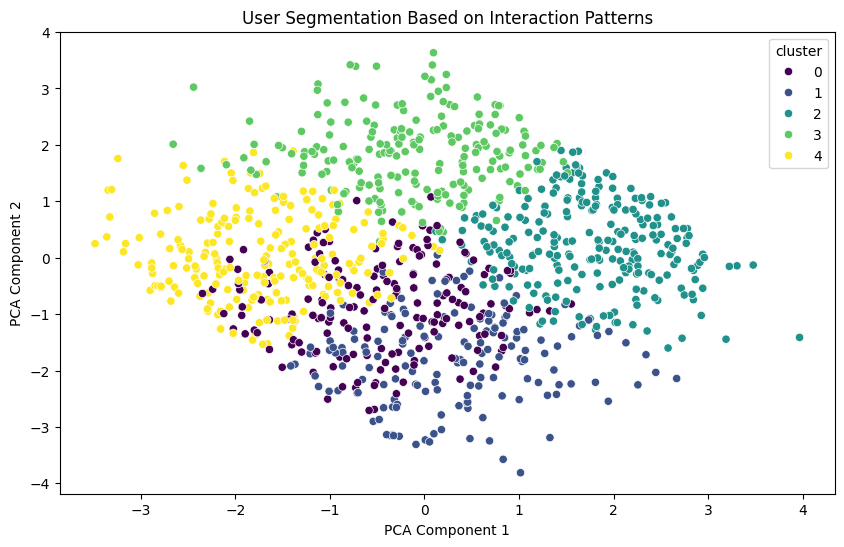

         sessions_per_week  avg_session_duration      posts       likes  \
cluster                                                                   
0                10.406780             80.082700  32.548023   62.062147   
1                 9.439490             55.848934  15.649682   57.070064   
2                 9.160494             57.395752  22.086420   57.263374   
3                10.362319             71.207786  29.652174  153.526570   
4                 9.495370             51.278118  24.666667  154.263889   

          comments  content_preference_score  engagement_score  \
cluster                                                          
0        67.485876                 24.209040         33.088136   
1        28.292994                 20.280255         22.714013   
2        51.037037                 22.518519         26.846502   
3        52.565217                 22.927536         49.002415   
4        49.069444                 22.986111         46.957870   

         mo

['scaler.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/enhanced_user_interactions.csv')

# Data Preprocessing
# 1. One-hot encode categorical columns FIRST
categorical_columns = ['gender', 'location']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy variable trap, sparse=False for pandas 2.0+
encoded_categorical = encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))
data = pd.concat([data, encoded_df], axis=1)
data.drop(columns=categorical_columns, inplace=True)

# 2. Handle missing values AFTER encoding categorical features
data.fillna(data.mean(), inplace=True)

# Feature selection (example features)
features = [
    'sessions_per_week', 'avg_session_duration', 'posts', 'likes', 'comments',
    'content_preference_score', 'engagement_score', 'mobile_usage_percent', 'desktop_usage_percent'
]
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

# Dimensionality Reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['cluster'], palette='viridis')
plt.title('User Segmentation Based on Interaction Patterns')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Insights
clusters_summary = data.groupby('cluster')[features].mean()
print(clusters_summary)

# Recommendation Engine (Basic Suggestion Framework)
def suggest_personalization(user_data, cluster_centroids):
    cluster_id = kmeans.predict(scaler.transform([user_data]))
    suggestions = cluster_centroids.loc[cluster_id].idxmax(axis=1).values
    return suggestions

# Save the model for deployment
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')



Determining the cluster chracteristics

Cluster Summary:
          sessions_per_week  avg_session_duration  engagement_score      posts  \
cluster                                                                         
0                10.406780             80.082700         33.088136  32.548023   
1                 9.439490             55.848934         22.714013  15.649682   
2                 9.160494             57.395752         26.846502  22.086420   
3                10.362319             71.207786         49.002415  29.652174   
4                 9.495370             51.278118         46.957870  24.666667   

              likes   comments  content_preference_score  \
cluster                                                    
0         62.062147  67.485876                 24.209040   
1         57.070064  28.292994                 20.280255   
2         57.263374  51.037037                 22.518519   
3        153.526570  52.565217                 22.927536   
4        154.263889  49.069444                 22.9861

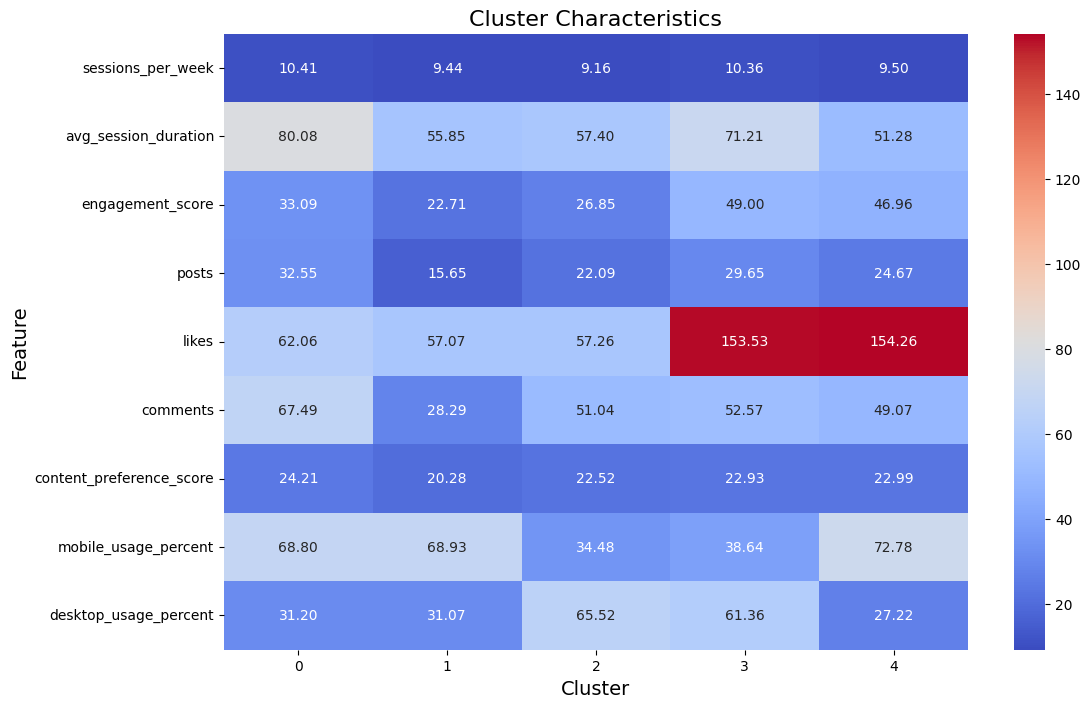

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/enhanced_user_interactions.csv'
data = pd.read_csv(file_path)

# Features for clustering
features = [
    'sessions_per_week', 'avg_session_duration', 'engagement_score',
    'posts', 'likes', 'comments', 'content_preference_score',
    'mobile_usage_percent', 'desktop_usage_percent'
]

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Analyze Each Cluster
cluster_summary = data.groupby('cluster')[features].mean()
print("Cluster Summary:\n", cluster_summary)

# Visualize Cluster Characteristics
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary.T, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Cluster Characteristics', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()


**2.Insights from dataset such as average session,platform engagement,content preferences**

<ipython-input-4-7b9732a8ff75>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='engagement_level', y='avg_session_duration', data=data, palette='coolwarm')


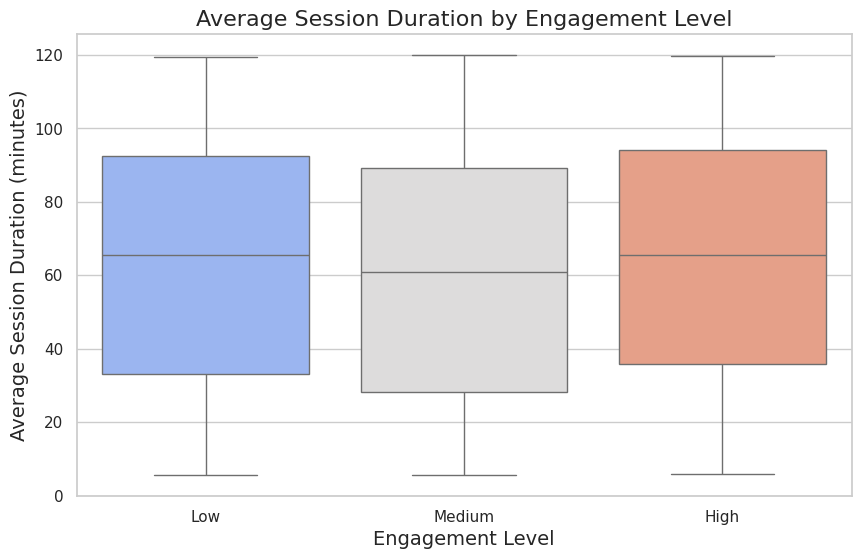

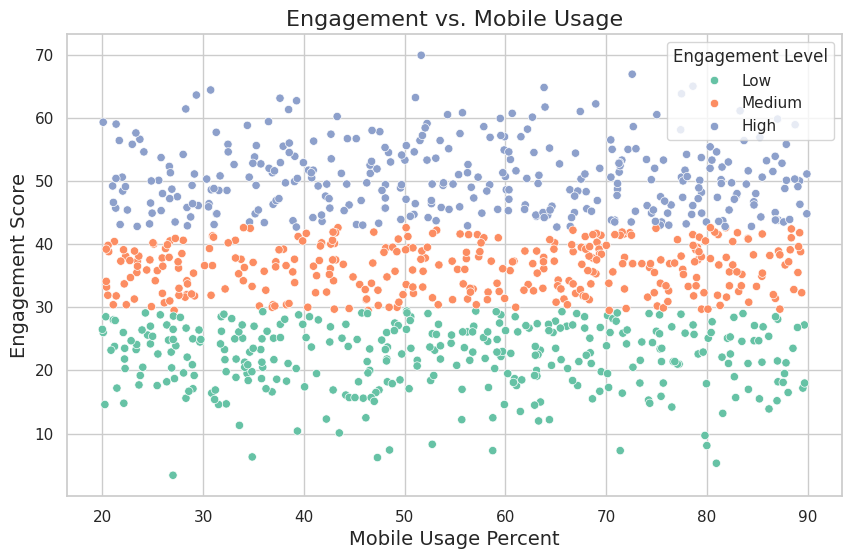

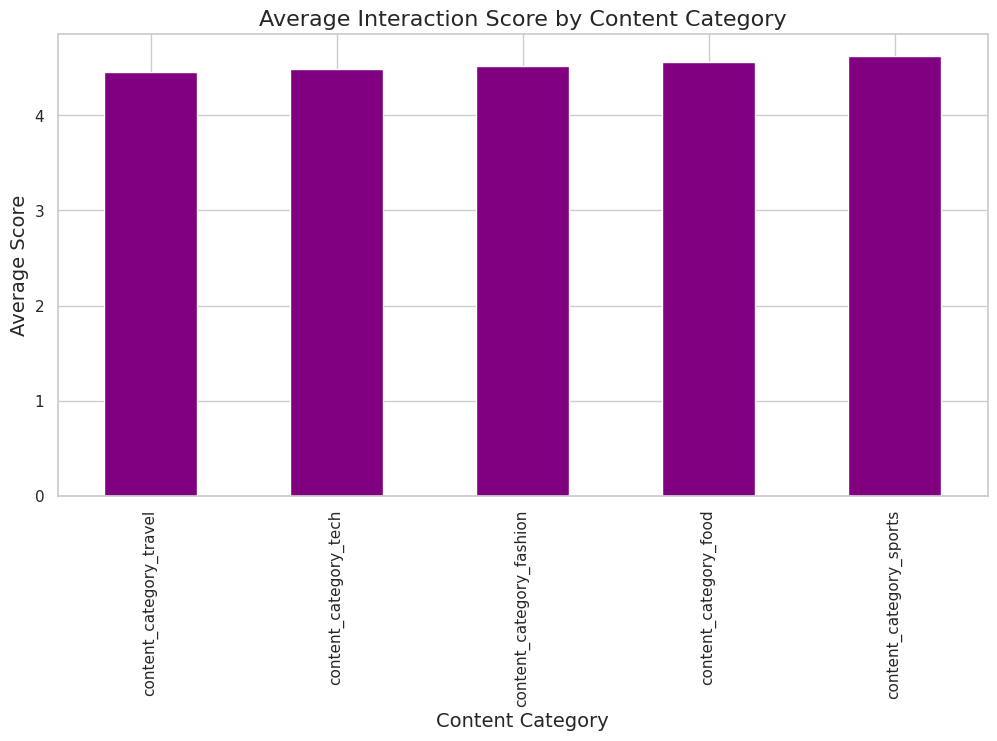

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/enhanced_user_interactions.csv'
data = pd.read_csv(file_path)

# Set up Seaborn style
sns.set(style="whitegrid")



# 1. Average Session Duration by Engagement Level
data['engagement_level'] = pd.qcut(data['engagement_score'], q=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='engagement_level', y='avg_session_duration', data=data, palette='coolwarm')
plt.title('Average Session Duration by Engagement Level', fontsize=16)
plt.xlabel('Engagement Level', fontsize=14)
plt.ylabel('Average Session Duration (minutes)', fontsize=14)
plt.show()


# 2. Engagement by Platform
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mobile_usage_percent', y='engagement_score', hue='engagement_level', data=data, palette='Set2')
plt.title('Engagement vs. Mobile Usage', fontsize=16)
plt.xlabel('Mobile Usage Percent', fontsize=14)
plt.ylabel('Engagement Score', fontsize=14)
plt.legend(title='Engagement Level')
plt.show()

# 3. Content Preferences
content_categories = [
    'content_category_sports', 'content_category_tech',
    'content_category_fashion', 'content_category_food',
    'content_category_travel'
]
content_summary = data[content_categories].mean()

plt.figure(figsize=(12, 6))
content_summary.sort_values().plot(kind='bar', color='purple')
plt.title('Average Interaction Score by Content Category', fontsize=16)
plt.xlabel('Content Category', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.show()


**3.Categorizing community based on their preferences**

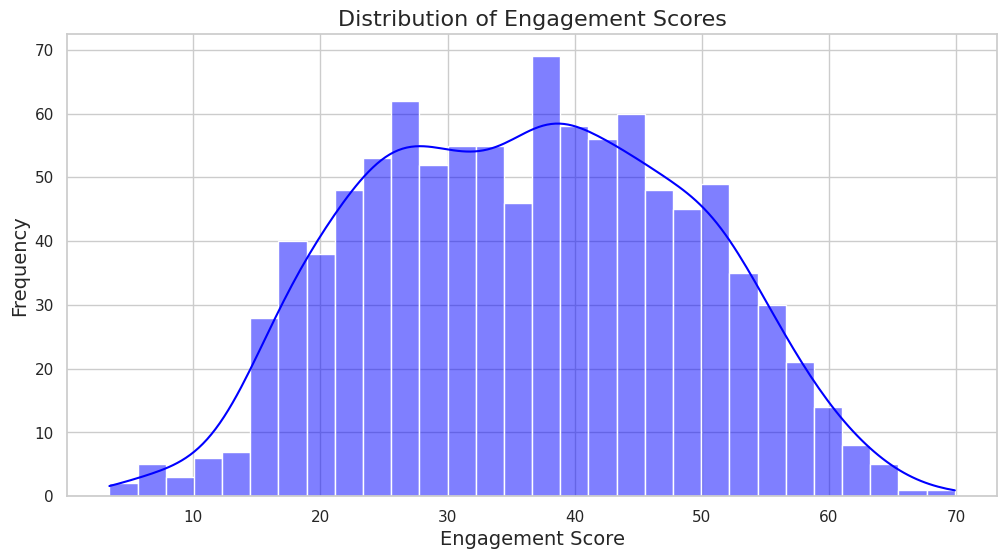

<ipython-input-8-2d98a5c3808c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='engagement_score', data=data, palette='pastel')


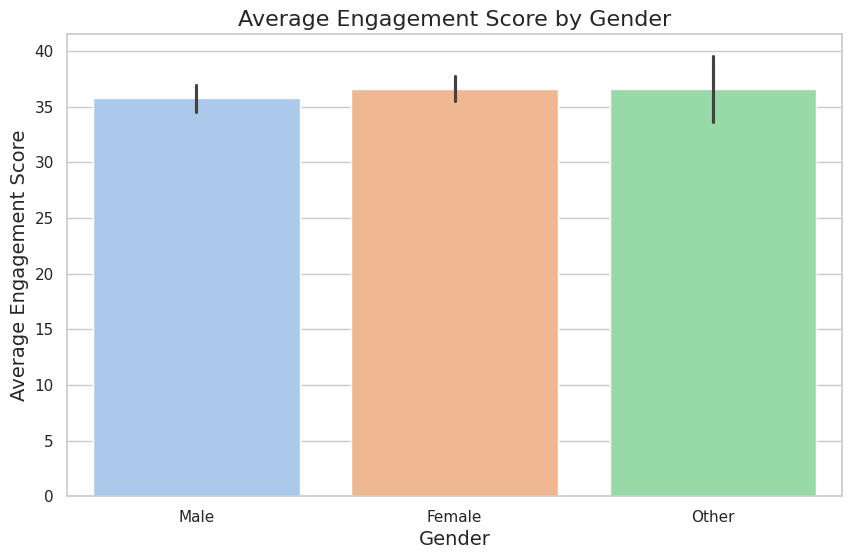

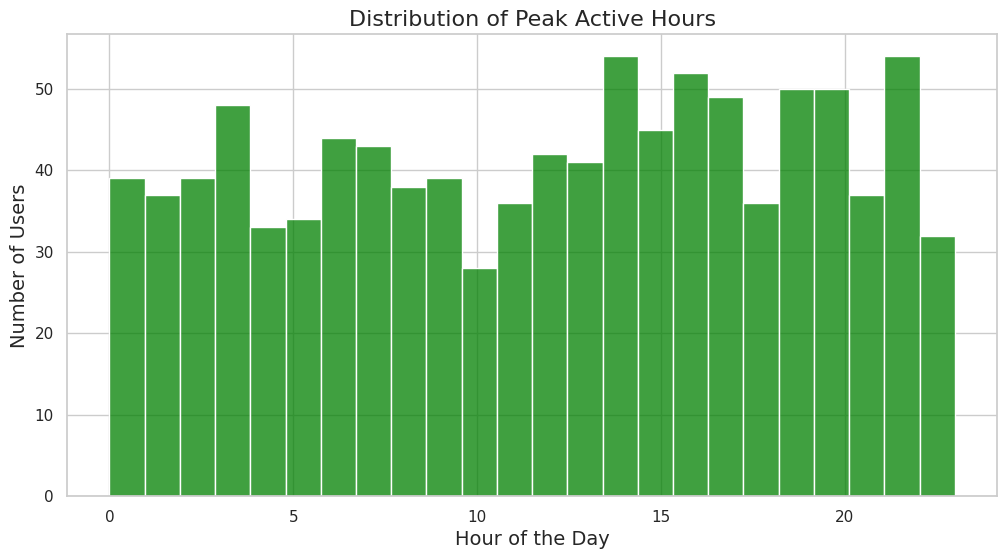

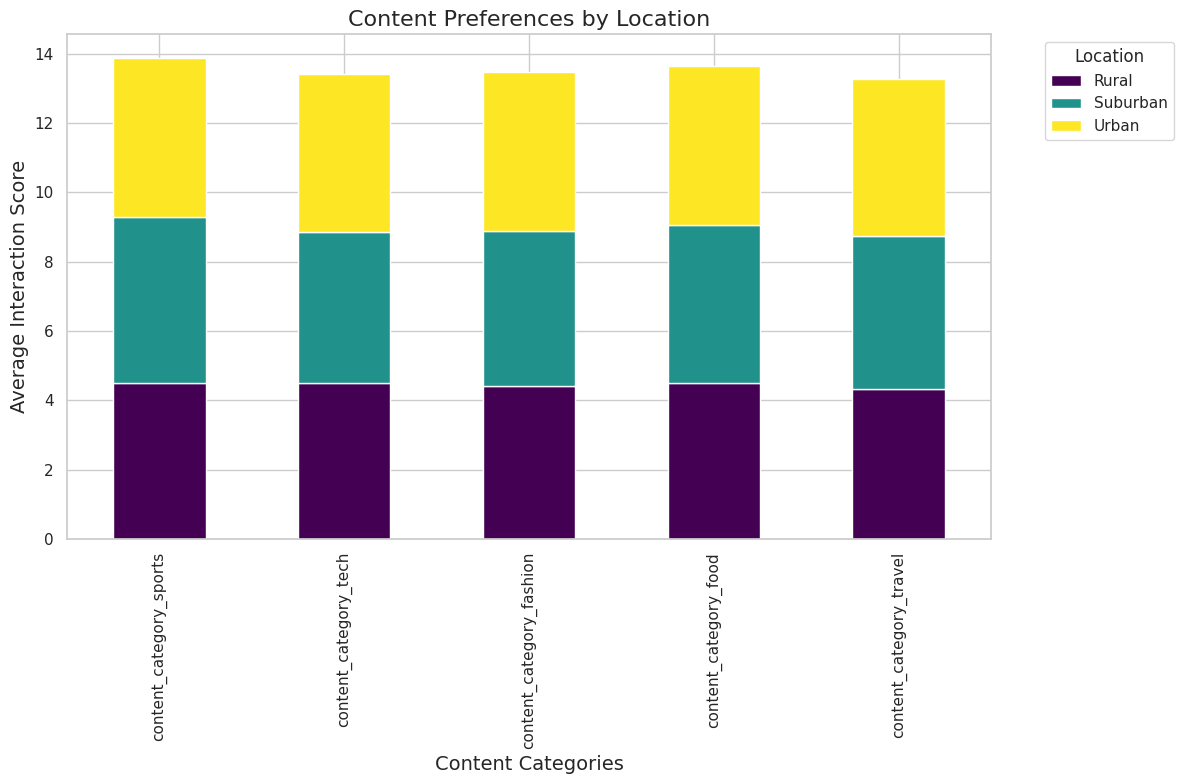

<Figure size 1000x800 with 0 Axes>

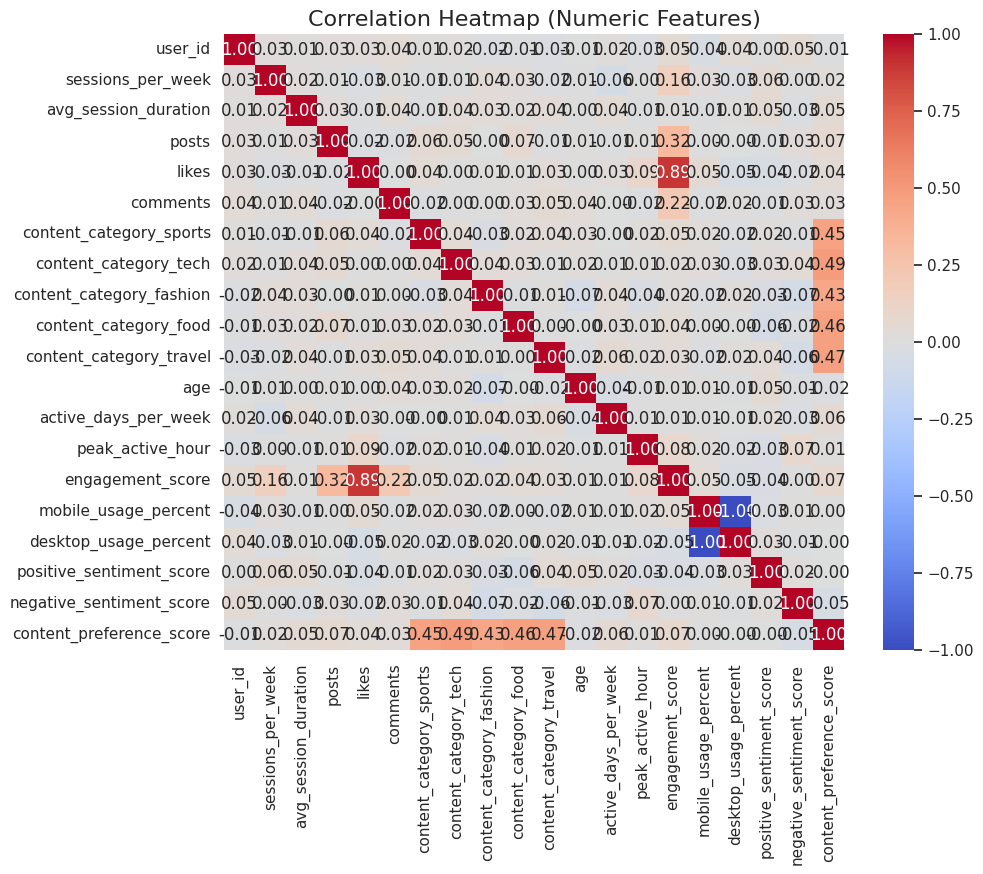

ValueError: could not convert string to float: 'Male'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the enhanced dataset
file_path = ''
data = pd.read_csv('/content/enhanced_user_interactions.csv')

# Set up the style for Seaborn
sns.set(style='whitegrid')

# 1. Distribution of Key Features
plt.figure(figsize=(12, 6))
sns.histplot(data['engagement_score'], kde=True, color='blue', bins=30)
plt.title('Distribution of Engagement Scores', fontsize=16)
plt.xlabel('Engagement Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# 2. Engagement by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='engagement_score', data=data, palette='pastel')
plt.title('Average Engagement Score by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Engagement Score', fontsize=14)
plt.show()

# 3. Peak Active Hour Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data['peak_active_hour'], kde=False, bins=24, color='green')
plt.title('Distribution of Peak Active Hours', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.show()

# 4. Content Preferences by Location
content_categories = [
    'content_category_sports', 'content_category_tech',
    'content_category_fashion', 'content_category_food',
    'content_category_travel'
]
content_preferences = data.groupby('location')[content_categories].mean().T

content_preferences.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Content Preferences by Location', fontsize=16)
plt.xlabel('Content Categories', fontsize=14)
plt.ylabel('Average Interaction Score', fontsize=14)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





**4.Personalization Strategies Using AI/ML for Enhanced User Engagement**

 Content Recommendation System

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Example: Recommend content based on similarity of preferences
content_features = [
    'content_category_sports', 'content_category_tech',
    'content_category_fashion', 'content_category_food',
    'content_category_travel'
]

# Calculate similarity matrix
content_matrix = data[content_features].values
similarity_matrix = cosine_similarity(content_matrix)

# Function to recommend content
def recommend_content(user_index, top_n=5):
    similar_users = np.argsort(similarity_matrix[user_index])[-top_n-1:-1][::-1]
    recommendations = data.iloc[similar_users][content_features]
    return recommendations

# Test for a user
user_index = 10
recommendations = recommend_content(user_index)
print(f"Recommendations for User {user_index}:\n", recommendations)


Recommendations for User 10:
      content_category_sports  content_category_tech  content_category_fashion  \
53                         1                      2                         5   
531                        1                      4                         6   
832                        0                      3                         6   
720                        0                      1                         8   
396                        3                      1                         8   

     content_category_food  content_category_travel  
53                       8                        1  
531                      8                        0  
832                      7                        0  
720                      9                        0  
396                      9                        0  


 Dynamic Engagement Scoring

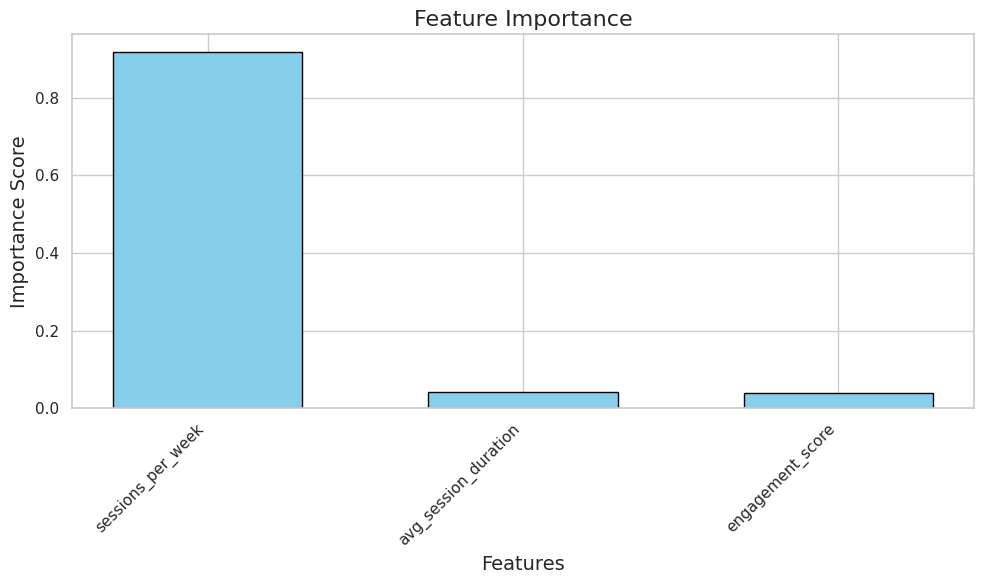

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
importances = model.feature_importances_
features = X.columns

# Plot bar graph with gaps
plt.figure(figsize=(10, 6))
x_positions = np.arange(len(features))  # Positions for the bars
plt.bar(x_positions, importances, width=0.6, color='skyblue', edgecolor='black')  # Adjust width for gaps

# Add labels and title
plt.xticks(x_positions, features, rotation=45, ha='right')  # Rotate feature names for better visibility
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance Score', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()



Personalized Notifications

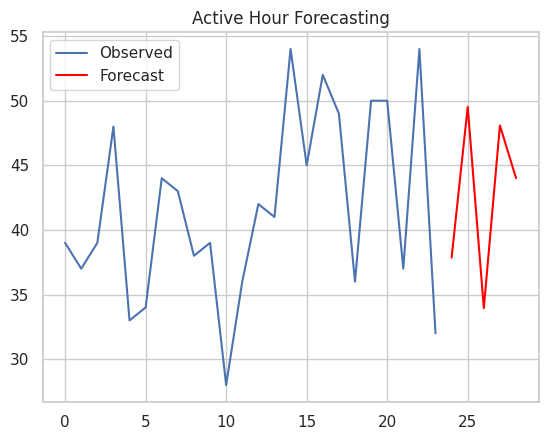

In [9]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Example: Forecasting active hours
time_series = data['peak_active_hour'].value_counts().sort_index()
model = ARIMA(time_series, order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=5)
plt.plot(time_series, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.title('Active Hour Forecasting')
plt.show()


 User Churn Prediction

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Add churn label (binary: 1 = Churn, 0 = Active)
data['churn'] = (data['sessions_per_week'] < 2).astype(int)

# Features and labels
X = data[['sessions_per_week', 'avg_session_duration', 'engagement_score']]
y = data['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00        19

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

